# Imports

In [25]:
import joblib
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost import XGBRFClassifier
from sklearn.neural_network import MLPClassifier

In [26]:
np.set_printoptions(threshold=np.inf)  # Muestra toda la matriz

# Load Data

In [27]:
lcs = joblib.load("TESS_Dict.pkl")

In [28]:
len(lcs.data[1])

16

In [29]:
lcs.keys()
lcs.features_names

array(['amplitude', 'beyond1_st', 'median abs', 'median BRP',
       'percent am', 'percent di', 'rcs', 'small kurt', 'max slopes',
       'std', 'linear tre', 'mean', 'gskew', 'meanv', 'skew'],
      dtype='<U10')

# Work

## Splits

In [30]:
X, y, ys = lcs.data, lcs.main_target, lcs.sub_target

x_train, x_test, y_train, y_test, ys_train, ys_test = train_test_split(X, y, ys, random_state=42)


rfc_features = [12, 15, 14, 6, 8, 1, 0, 2, 7]
x_train_RFC = x_train[:, rfc_features]
x_test_RFC = x_test[:, rfc_features]
y_train_RFC = y_train
y_test_RFC = y_test

## First Classification
From all data, we first classify into 3:
* Rotating
* Eclipsing
* Pulsating

**Mododelo Seleccionado:** RandomForestClassifier

In [31]:
rforest = RandomForestClassifier(n_estimators=80, random_state=42)
rforest.fit(x_train_RFC, y_train_RFC)
y_pred_forest = rforest.predict(x_test_RFC)
forest_acc = accuracy_score(y_test_RFC, y_pred_forest)
print(f"Random Forest: {forest_acc:.4f}") # 0.8987

Random Forest: 0.8987


In [32]:
etc = ExtraTreesClassifier(n_estimators=200, random_state=42)
etc.fit(x_train_RFC, y_train_RFC)
y_pred_etc = etc.predict(x_test_RFC)
etc_acc = accuracy_score(y_test_RFC, y_pred_etc)
print(f"ETC: {etc_acc:.4f}")

ETC: 0.8915


In [33]:
xgr = XGBRFClassifier(random_state=42)
xgr.fit(x_train, y_train)
y_pred_xgr = xgr.predict(x_test)
xgr_acc = accuracy_score(y_test, y_pred_xgr)
print(f"Xboost: {xgr_acc:.4f}")

Xboost: 0.8915


## Second Classification

### Second Split

In [34]:
# ------------------- ROTATING -------------------#

rot_train = y_train == 0 # Rotating
rot_test = y_test == 0
X_rot_train = x_train[rot_train]
X_rot_test = x_test[rot_test]
rot_features = [11, 8, 1, 7, 6, 14, 3, 5, 12]
x_train_rot = X_rot_train[:, rot_features]
x_test_rot  = X_rot_test[:, rot_features]
y_train_rot = ys_train[rot_train]
y_test_rot = ys_test[rot_test]

# ------------------- PULSATING -------------------#

pul_train = y_train == 1 # Pulsating
pul_test = y_test == 1
X_pul_train = x_train[pul_train]
X_pul_test = x_test[pul_test]
pul_features = [15, 9, 0, 2, 6, 7, 4, 8, 14, 5, 1, 12, 3, 11]
x_train_pul = X_pul_train[:, pul_features]
x_test_pul = X_pul_test[:, pul_features]
y_train_pul = ys_train[pul_train]
y_test_pul = ys_test[pul_test]

# ------------------- ECLIPSING -------------------#

ecl_train = y_train == 2 # Eclipsing
ecl_test = y_test == 2
X_ecl_train = x_train[ecl_train]
X_ecl_test = x_test[ecl_test]
ecl_features = [14, 3, 1, 7, 15, 11, 2, 12, 8, 5]
x_train_ecl = X_ecl_train[:, ecl_features]
x_test_ecl = X_ecl_test[:, ecl_features]
y_train_ecl = ys_train[ecl_train]
y_test_ecl = ys_test[ecl_test]

### Modeling

In [35]:
rot_model = MLPClassifier(hidden_layer_sizes=100, max_iter=1000, random_state=42)
rot_model.fit(x_train_rot, y_train_rot)
y_pred_rot = rot_model.predict(x_test_rot)
acc_rot = accuracy_score(y_test_rot, y_pred_rot)
print(f"Subclasificación Rotating: {acc_rot:.4f}") # MLP  0.9679 100

Subclasificación Rotating: 0.9679


In [36]:
pul_model = RandomForestClassifier(n_estimators=90, random_state=42)
pul_model.fit(x_train_pul, y_train_pul)
y_pred_pul = pul_model.predict(x_test_pul)
acc_pul = accuracy_score(y_test_pul, y_pred_pul)
print(f"Subclasificación Pulsating: {acc_pul:.4f}") # RFC 0.8176 90

Subclasificación Pulsating: 0.8176


In [37]:
ecl_model = RandomForestClassifier(n_estimators=200, random_state=42)
ecl_model.fit(x_train_ecl, y_train_ecl)
y_pred_ecl = ecl_model.predict(x_test_ecl)
acc_ecl = accuracy_score(y_test_ecl, y_pred_ecl)
print(f"Subclasificación Eclipsing: {acc_ecl:.4f}") # RFC 0.8898 200

Subclasificación Eclipsing: 0.8898


# Implement ALL

## Models + FIT

In [38]:
rforest = RandomForestClassifier(n_estimators=80, random_state=42)
rforest.fit(x_train_RFC, y_train_RFC)

rot_model = MLPClassifier(hidden_layer_sizes=100, max_iter=1000, random_state=42)
rot_model.fit(x_train_rot, y_train_rot)

pul_model = RandomForestClassifier(n_estimators=300, random_state=42)
pul_model.fit(x_train_pul, y_train_pul)

ecl_model = RandomForestClassifier(n_estimators=300, random_state=42)
ecl_model.fit(x_train_ecl, y_train_ecl)

RandomForestClassifier(n_estimators=300, random_state=42)

## predict + metrics

In [39]:
y_pred_main = rforest.predict(x_test_RFC)

# Inicializamos un array para almacenar las predicciones finales (subclase) de cada muestra
y_pred_sub = np.empty_like(ys_test)

# Para las muestras predichas como "Rotating" (clase 0)
idx_rot = np.where(y_pred_main == 0)[0]
if idx_rot.size > 0:
    # Extraemos las características específicas para rot_model
    y_pred_sub[idx_rot] = rot_model.predict(x_test[idx_rot][:, rot_features])

# Para las muestras predichas como "Pulsating" (clase 1)
idx_pul = np.where(y_pred_main == 1)[0]
if idx_pul.size > 0:
    y_pred_sub[idx_pul] = pul_model.predict(x_test[idx_pul][:, pul_features])

# Para las muestras predichas como "Eclipsing" (clase 2)
idx_ecl = np.where(y_pred_main == 2)[0]
if idx_ecl.size > 0:
    y_pred_sub[idx_ecl] = ecl_model.predict(x_test[idx_ecl][:, ecl_features])

# Cálculo de la precisión total
precision_total = accuracy_score(ys_test, y_pred_sub)
print("Precisión total:", precision_total)

Precisión total: 0.7952917093142272


# ROC

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

## Main Classifier RFC

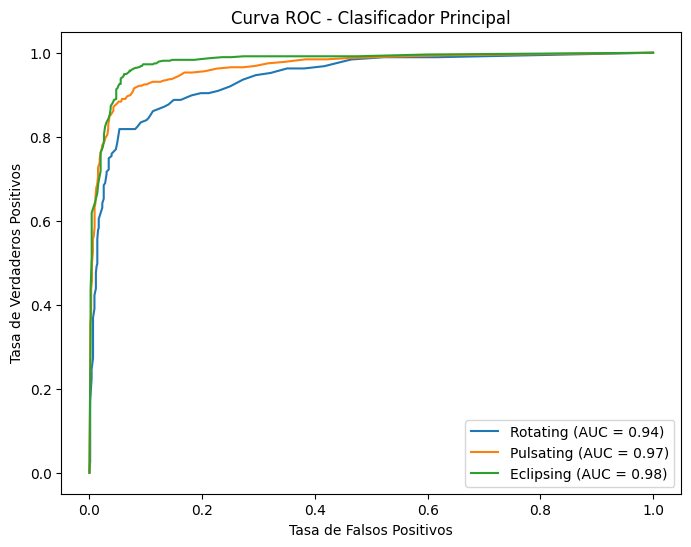

In [41]:
# Obtener las probabilidades predichas para cada clase
y_score_rforest = rforest.predict_proba(x_test_RFC)

# Binarizar las etiquetas verdaderas
classes = np.unique(y_test_RFC)
y_test_bin = label_binarize(y_test_RFC, classes=classes)
n_classes = y_test_bin.shape[1]

# Calcular fpr, tpr y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_rforest[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Ejemplo: Graficar las curvas ROC para el clasificador principal
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    # Usamos main_target_names para etiquetar cada curva con el nombre real de la clase
    plt.plot(fpr[i], tpr[i], label=f'{lcs.main_target_names[classes[i]]} (AUC = {roc_auc[i]:.2f})')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Clasificador Principal')
plt.legend(loc='lower right')
plt.show()

## ROT Classifier MLP

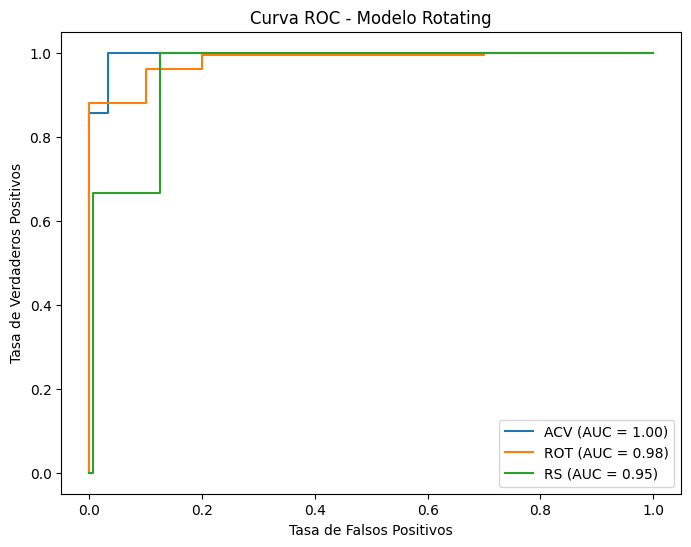

In [42]:
# Obtener probabilidades para rot_model
y_score_rot = rot_model.predict_proba(x_test_rot)

# Binarizar las etiquetas verdaderas (asumiendo que rot_model es multiclase; si es binario, no es necesario)
rot_classes = np.unique(y_test_rot)
y_test_rot_bin = label_binarize(y_test_rot, classes=rot_classes)
n_rot_classes = y_test_rot_bin.shape[1]

fpr_rot = dict()
tpr_rot = dict()
roc_auc_rot = dict()
for i in range(n_rot_classes):
    fpr_rot[i], tpr_rot[i], _ = roc_curve(y_test_rot_bin[:, i], y_score_rot[:, i])
    roc_auc_rot[i] = auc(fpr_rot[i], tpr_rot[i])

# Graficar la curva ROC para rot_model
plt.figure(figsize=(8, 6))
for i in range(n_rot_classes):
    plt.plot(fpr_rot[i], tpr_rot[i], label=f'{lcs.sub_target_names[rot_classes[i]]} (AUC = {roc_auc_rot[i]:.2f})')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Modelo Rotating')
plt.legend(loc='lower right')
plt.show()


## PUL Classifier RFC

Not-well classified stars:
* DCEP-FU
* DSCT
* L
* RRAB
* RRAB_BL
* RRC
* RRD
* SR

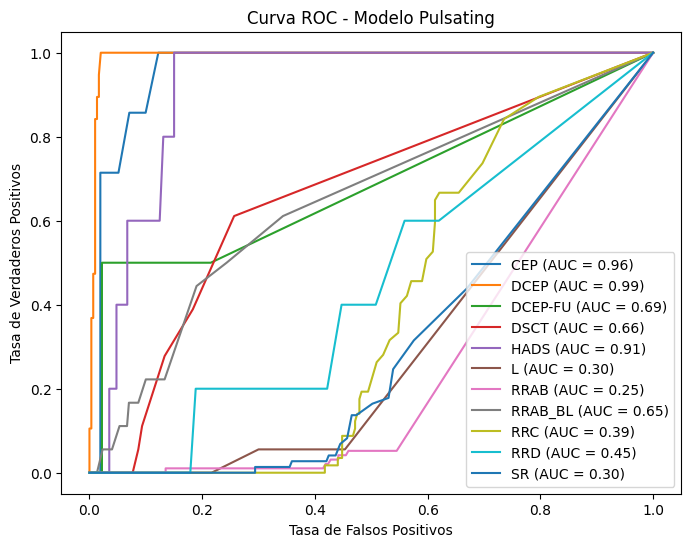

In [43]:
# Obtener probabilidades para rot_model
y_score_pul = pul_model.predict_proba(x_test_pul)

# Binarizar las etiquetas verdaderas (asumiendo que rot_model es multiclase; si es binario, no es necesario)
pul_classes = np.unique(y_test_pul)
y_test_pul_bin = label_binarize(y_test_pul, classes=pul_classes)
n_pul_classes = y_test_pul_bin.shape[1]

fpr_pul = dict()
tpr_pul = dict()
roc_auc_pul = dict()
for i in range(n_pul_classes):
    fpr_pul[i], tpr_pul[i], _ = roc_curve(y_test_pul_bin[:, i], y_score_pul[:, i])
    roc_auc_pul[i] = auc(fpr_pul[i], tpr_pul[i])

# Graficar la curva ROC para rot_model
plt.figure(figsize=(8, 6))
for i in range(n_pul_classes):
    plt.plot(fpr_pul[i], tpr_pul[i], label=f'{lcs.sub_target_names[pul_classes[i]]} (AUC = {roc_auc_pul[i]:.2f})')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Modelo Pulsating')
plt.legend(loc='lower right')
plt.show()

## ECL Classifier RFC

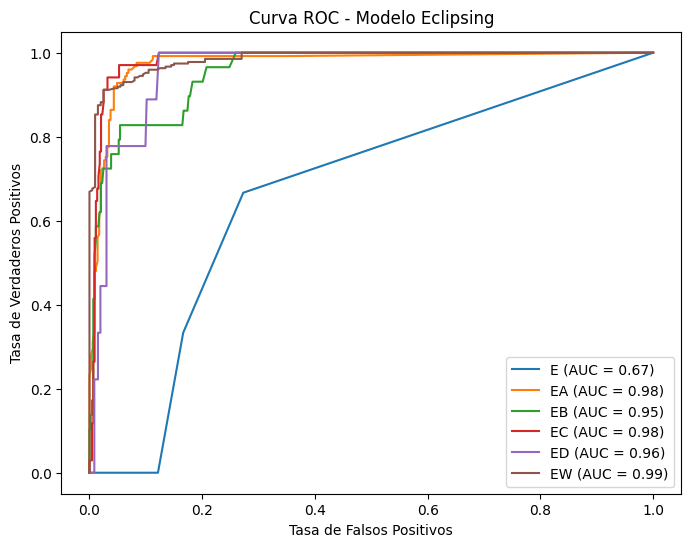

In [44]:
# Obtener probabilidades para rot_model
y_score_ecl = ecl_model.predict_proba(x_test_ecl)

# Binarizar las etiquetas verdaderas (asumiendo que rot_model es multiclase; si es binario, no es necesario)
ecl_classes = np.unique(y_test_ecl)
y_test_ecl_bin = label_binarize(y_test_ecl, classes=ecl_classes)
n_ecl_classes = y_test_ecl_bin.shape[1]

fpr_ecl = dict()
tpr_ecl = dict()
roc_auc_ecl = dict()
for i in range(n_ecl_classes):
    fpr_ecl[i], tpr_ecl[i], _ = roc_curve(y_test_ecl_bin[:, i], y_score_ecl[:, i])
    roc_auc_ecl[i] = auc(fpr_ecl[i], tpr_ecl[i])

# Graficar la curva ROC para rot_model
plt.figure(figsize=(8, 6))
for i in range(n_ecl_classes):
    plt.plot(fpr_ecl[i], tpr_ecl[i], label=f'{lcs.sub_target_names[ecl_classes[i]]} (AUC = {roc_auc_ecl[i]:.2f})')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Modelo Eclipsing')
plt.legend(loc='lower right')
plt.show()

# Last Analisis

In [45]:
import corner

In [46]:
X, ys = lcs.data, lcs.sub_target

In [47]:
extend_features = lcs.features_names[:]
extend_features = np.append(extend_features, 'LombScargle')

pul_features_names = extend_features[pul_features]
ecl_features_names = extend_features[ecl_features]

In [48]:
e_selection = X[ys == 6]
ea_selection = X[ys == 7]
eb_selection = X[ys == 8]
ec_selection = X[ys == 9]
ed_selection = X[ys == 10]
ew_selection = X[ys == 11]

e_data = e_selection[:, ecl_features]
ea_data = ea_selection[:, ecl_features]
eb_data = eb_selection[:, ecl_features]
ec_data = ec_selection[:, ecl_features]
ed_data = ed_selection[:, ecl_features]
ew_data = ew_selection[:, ecl_features]

In [ ]:
def extractor(X, ys, features, extend_features):
    pul_features_names = extend_features[features]
    
    cep_selection = X[ys == 1]
    dcep_selection = X[ys == 2]
    dcepfu_selection = X[ys == 3]
    dceps_selection = X[ys == 4]
    dsct_selection = X[ys == 5]
    hads_selection = X[ys == 12]
    l_selection = X[ys == 13]
    rr_selection = X[ys == 15]
    rrab_selection = X[ys == 16]
    rrabbl_selection = X[ys == 17]
    rrc_selection = X[ys == 18]
    rrd_selection = X[ys == 19]
    sr_selection = X[ys == 21]

    cep_data = cep_selection[:, features] #
    dcep_data = dcep_selection[:, features]
    dcepfu_data = dcepfu_selection[:, features]
    dceps_data = dceps_selection[:, features]
    dsct_data = dsct_selection[:, features] #
    hads_data = hads_selection[:, features] #
    l_data = l_selection[:, features] #
    rr_data = rr_selection[:, features]
    rrab_data = rrab_selection[:, features] #
    rrabbl_data = rrabbl_selection[:, features] #
    rrc_data = rrc_selection[:, features] #
    rrd_data = rrd_selection[:, features] #
    sr_data = sr_selection[:, features] #

    data = [cep_data, dcep_data, dcepfu_data, dceps_data, dsct_data, hads_data, l_data, rr_data,
            rrab_data, rrabbl_data, rrc_data, rrd_data, sr_data]

    return pul_features_names, data

In [50]:
def plotting(data, colors, figure, features_names, save, show):
    corner.corner(data[0], color=colors[0], fig=figure, labels=features_names, quiet=True)
    corner.corner(data[4], color=colors[1], fig=figure, labels=features_names, quiet=True)
    corner.corner(data[5], color=colors[2], fig=figure, labels=features_names, quiet=True)
    corner.corner(data[6], color=colors[3], fig=figure, labels=features_names, quiet=True)
    corner.corner(data[8], color=colors[4], fig=figure, labels=features_names, quiet=True)
    corner.corner(data[9], color=colors[5], fig=figure, labels=features_names, quiet=True)
    corner.corner(data[10], color=colors[6], fig=figure, labels=features_names, quiet=True)
    corner.corner(data[11], color=colors[7], fig=figure, labels=features_names, quiet=True)
    corner.corner(data[12], color=colors[8], fig=figure, labels=features_names, quiet=True)
    
    plt.suptitle("PULSATING")

    for color, label in zip(colors, features_names):
        plt.scatter([], [], color=color, label=label)

    figure.legend(loc="upper right", fontsize=12, title="Variable Types")

    if (save):
        plt.savefig("pulsating_plot_2.png", dpi=300, bbox_inches='tight')
        # O guardar como SVG (formato vectorial)
        plt.savefig("pulsating_plot_2.svg", format='svg', bbox_inches='tight')
    
    if (show):
        plt.show()

In [51]:
pul_features = [15, 9, 0, 2, 6, 7, 4]
pul_features2 = [8, 14, 5, 1, 12, 3, 11]

In [72]:
features_names1, ecl_data1 = extractor(X, ys, pul_features, extend_features)
features_names2, ecl_data2 = extractor(X, ys, pul_features2, extend_features)

13
13


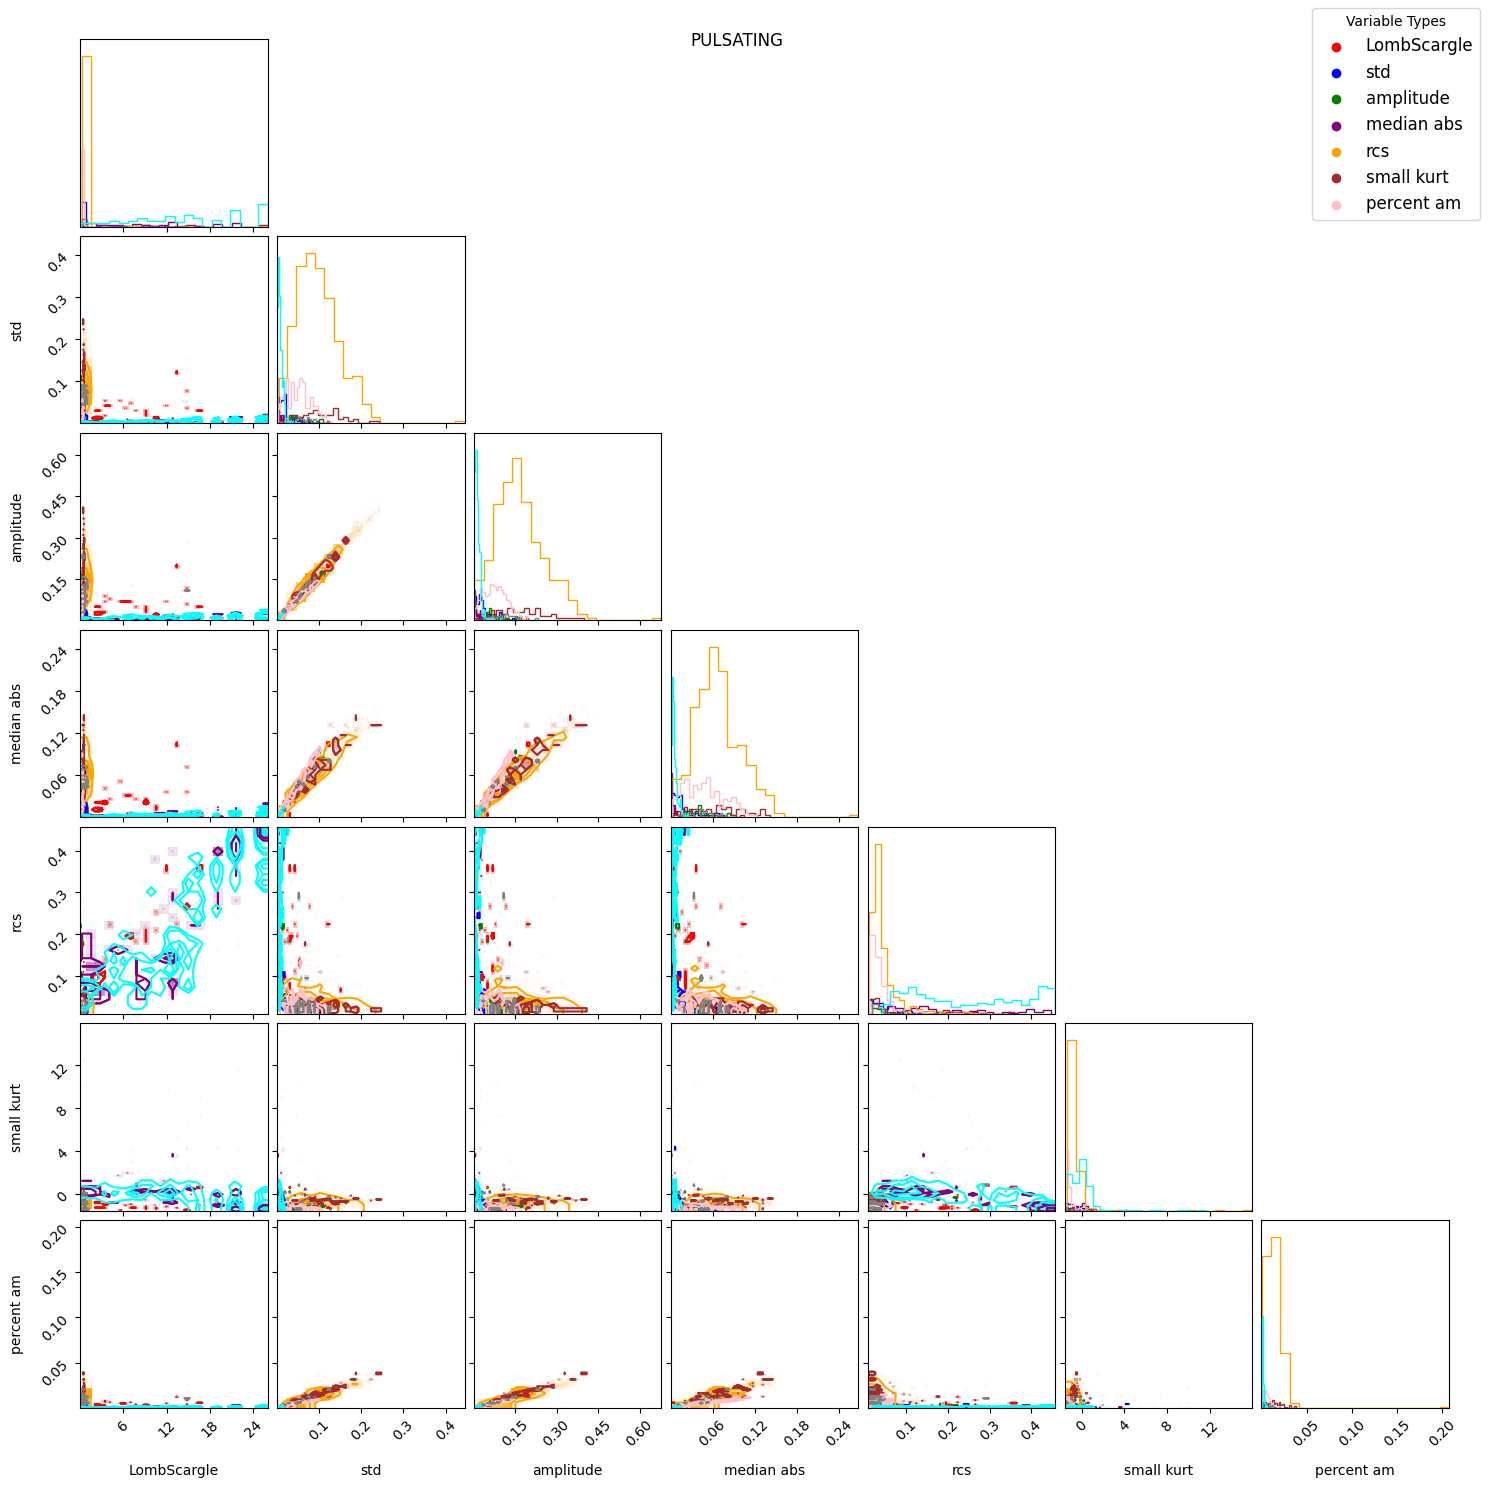

In [58]:
colors = ["red", "blue", "green", "purple", "orange", "brown", "pink", "gray", "cyan"]
labels = ["CEP", "DSCT", "HADS", "L", "RRAB", "RRAB-BL", "RRC", "RRD", "SR"]

figure = plt.figure(figsize=(15, 15))  # Ajusta los valores según el tamaño deseado
plotting(ecl_data1, colors, figure, features_names1, False, True)

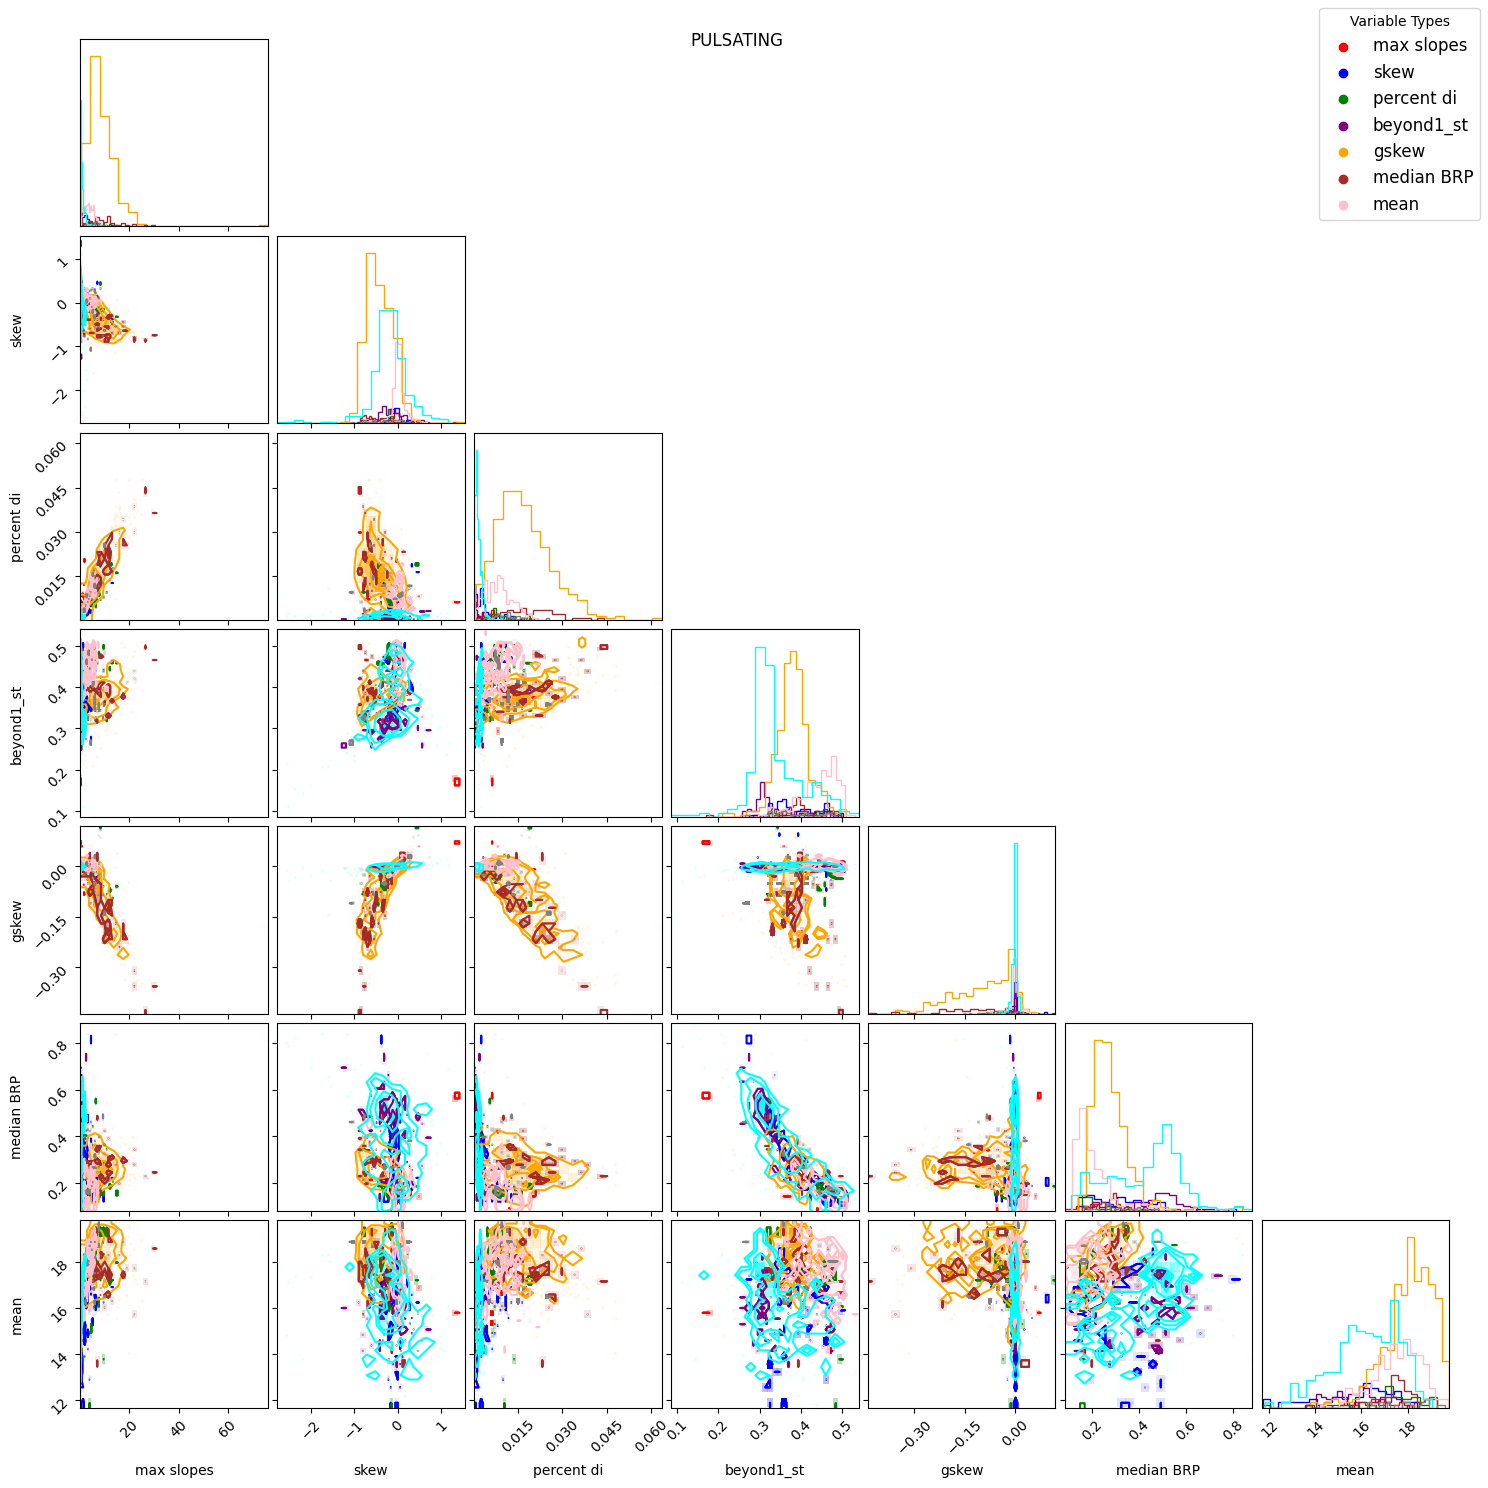

In [73]:
figure = plt.figure(figsize=(15, 15))  # Ajusta los valores según el tamaño deseado
plotting(ecl_data2, colors, figure, features_names2, False, True)